* HOG (Histogram of Oriented Gradients) is a feature descriptor used for object detection.

* Intuition: Local object appearance and shape within an image can be described by the distribution of intensity, gradients, or edge directions

In [30]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, io, exposure, color
from skimage.util import crop
from skimage.transform import resize

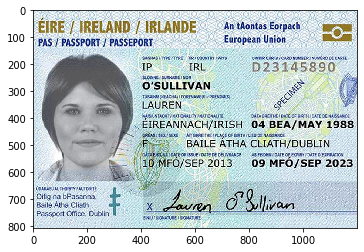

In [8]:
img1 = io.imread("images/irish_passport.jpg")
plt.imshow(img1,cmap='gray')

In [13]:
img1.shape

(806, 1200, 3)

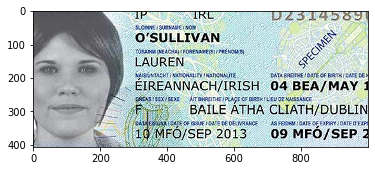

In [27]:
cropped_image = crop(img1, ((200,200),(100,100),(0,0)),copy=False)

plt.imshow(cropped_image)

In [41]:
fd, hog_img = hog(cropped_image,
                 pixels_per_cell = (16,16), # block size
                 block_norm="L2-Hys", # normalization to make the gradients stable to change in lightings
                 visualize=True, 
                 multichannel=True) # for color images

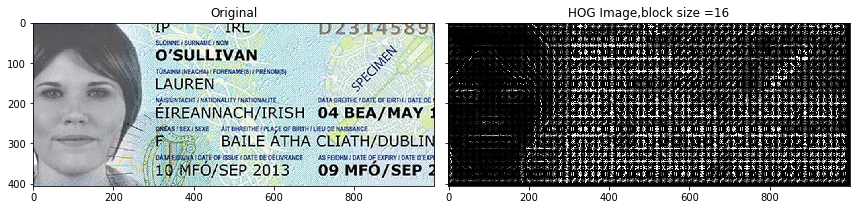

In [46]:
fig, axes = plt.subplots(1,2,
                        figsize=(12,10),
                        sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(cropped_image, cmap='gray')
ax[0].set_title("Original")

hog_image_rescaled = exposure.rescale_intensity(hog_img,
                                               in_range=(0,10))

ax[1].imshow(hog_image_rescaled,cmap="gray")
ax[1].set_title("HOG Image,block size =16")

plt.tight_layout()
plt.show()

## uses a small block size to get more granular HOG descripotors

In [44]:
fd, hog_img2 = hog(cropped_image,
                 pixels_per_cell = (8,8), # smaller block size
                 block_norm="L2-Hys",
                 visualize=True, 
                 multichannel=True) 

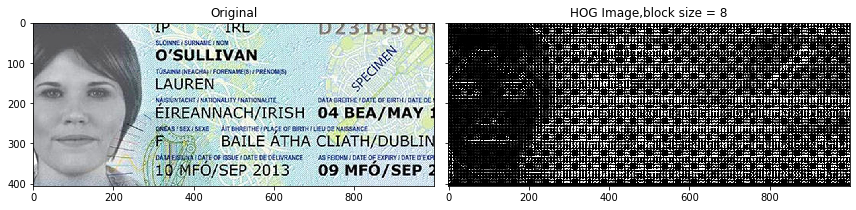

In [47]:
fig, axes = plt.subplots(1,2,
                        figsize=(12,10),
                        sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(cropped_image, cmap='gray')
ax[0].set_title("Original")

hog_image_rescaled = exposure.rescale_intensity(hog_img2,
                                               in_range=(0,10))

ax[1].imshow(hog_image_rescaled,cmap="gray")
ax[1].set_title("HOG Image,block size = 8")

plt.tight_layout()
plt.show()

## use L1 norm & L1 norm squared instead of L2 norm

In [56]:
# L1 norm
fd, hog_img_L1 = hog(cropped_image,
                 pixels_per_cell = (8,8), 
                 block_norm="L1",
                 visualize=True, 
                 multichannel=True) 

hog_image_rescaled_L1 = exposure.rescale_intensity(hog_img_L1,
                                               in_range=(0,10))

In [57]:
# L1 norm squared
fd, hog_img_L1_sqrt = hog(cropped_image,
                 pixels_per_cell = (8,8),
                 block_norm="L1-sqrt",
                 visualize=True, 
                 multichannel=True) 

hog_image_rescaled_L1_sqrt = exposure.rescale_intensity(hog_img_L1_sqrt,
                                               in_range=(0,10))

In [58]:
# L2 
fd, hog_img_L2 = hog(cropped_image,
                 pixels_per_cell = (8,8), 
                 block_norm="L2",
                 visualize=True, 
                 multichannel=True) 

hog_image_rescaled_L2 = exposure.rescale_intensity(hog_img_L2,
                                               in_range=(0,10))

In [59]:
# L2-Hys
fd, hog_img_L2_hys = hog(cropped_image,
                 pixels_per_cell = (8,8), 
                 block_norm="L2-Hys",
                 visualize=True, 
                 multichannel=True) 

hog_image_rescaled_L2_hys = exposure.rescale_intensity(hog_img_L2_hys,
                                               in_range=(0,10))

Text(0.5, 1.0, 'L2-Hys')

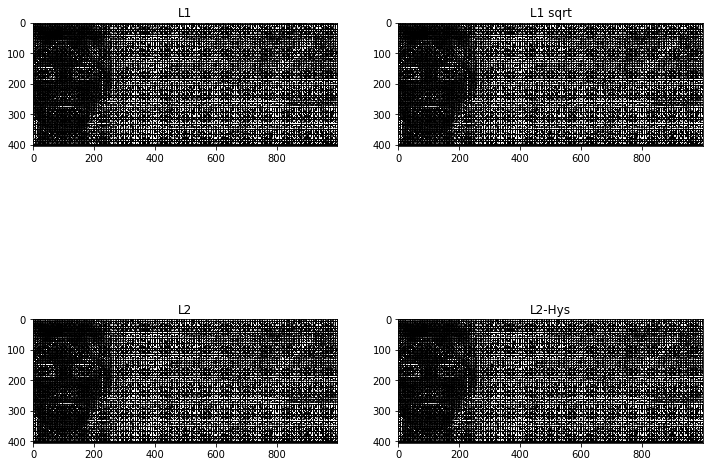

In [61]:
fig, axarr = plt.subplots(2,2,
                        figsize=(12,10))


axarr[0,0].imshow(hog_image_rescaled_L1, cmap='gray')
axarr[0,0].set_title("L1")

axarr[0,1].imshow(hog_image_rescaled_L1_sqrt, cmap='gray')
axarr[0,1].set_title("L1 sqrt")

axarr[1,0].imshow(hog_image_rescaled_L2, cmap='gray')
axarr[1,0].set_title("L2")

axarr[1,1].imshow(hog_image_rescaled_L2_hys, cmap='gray')
axarr[1,1].set_title("L2-Hys")

